In [65]:
import random
import numpy as np
import pandas as pd
import timeit
import time
%timeit
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
from datetime import datetime #Import the datetime module from the datelime library
import matplotlib.pyplot as plt

In [55]:
#Create a set of random latitutes and longitudes
lats = np.random.uniform(low=-90.000,high = 90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)
#cities

624

In [56]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
url = ""

Beginning Data Retrieval     
-----------------------------


In [57]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []
for i, city in enumerate(cities):
    
    #Group cities in sets of 50
    if (i%50==0 and i>=50):
        set_count += 1
        record_count = 1
    
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #print(city_url)
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print(f"City not found. Skipping...Set:{set_count}")
        print(city_url)
        pass

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=adef694c8be70b11b749f01ac3317177&q=amderma
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=adef694c8be70b11b749f01ac3317177&q=belushya+guba
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=adef694c8be70b11b749f01ac3317177&q=barentsburg
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=adef694c8be70b11b749f01ac3317177&q=phan+rang
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=adef694c8be70b11b749f01ac3317177&q=nizhneyansk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=adef694c8be70b11b749f01ac3317177&q=vaitupu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=adef694c8be70b11b749f01ac3317177&q=longlac
City not fo

In [58]:
#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


-----------------------------
Data Retrieval Complete      
-----------------------------


In [59]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.78,75,75,9.26,KI,2021-09-25 20:26:41
1,Sao Gabriel Da Cachoeira,-0.1303,-67.0892,87.60,62,40,5.75,BR,2021-09-25 20:22:55
2,Ushuaia,-54.8000,-68.3000,44.26,57,20,19.57,AR,2021-09-25 20:26:02
3,Pemba,-12.9740,40.5178,75.90,88,40,9.22,MZ,2021-09-25 20:26:42
4,Atuona,-9.8000,-139.0333,78.33,77,87,20.04,PF,2021-09-25 20:26:42
...,...,...,...,...,...,...,...,...,...
564,Bantry,51.6833,-9.4500,60.28,96,100,7.90,IE,2021-09-25 20:29:48
565,Nurota,40.5614,65.6886,69.89,14,0,4.90,UZ,2021-09-25 20:29:48
566,Port Hardy,50.6996,-127.4199,51.98,100,90,9.22,CA,2021-09-25 20:29:48
567,Huarmey,-10.0681,-78.1522,69.22,73,82,12.59,PE,2021-09-25 20:29:49


In [60]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-09-25 20:26:41,3.0707,172.7902,82.78,75,75,9.26
1,Sao Gabriel Da Cachoeira,BR,2021-09-25 20:22:55,-0.1303,-67.0892,87.60,62,40,5.75
2,Ushuaia,AR,2021-09-25 20:26:02,-54.8000,-68.3000,44.26,57,20,19.57
3,Pemba,MZ,2021-09-25 20:26:42,-12.9740,40.5178,75.90,88,40,9.22
4,Atuona,PF,2021-09-25 20:26:42,-9.8000,-139.0333,78.33,77,87,20.04
...,...,...,...,...,...,...,...,...,...
564,Bantry,IE,2021-09-25 20:29:48,51.6833,-9.4500,60.28,96,100,7.90
565,Nurota,UZ,2021-09-25 20:29:48,40.5614,65.6886,69.89,14,0,4.90
566,Port Hardy,CA,2021-09-25 20:29:48,50.6996,-127.4199,51.98,100,90,9.22
567,Huarmey,PE,2021-09-25 20:29:49,-10.0681,-78.1522,69.22,73,82,12.59


In [61]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [63]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Get today's date in seconds.
#today = time.time()

#Get today in correct format
today = time.strftime("%x")
today

'09/25/21'

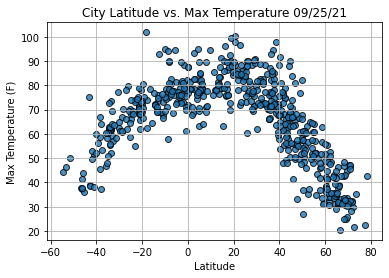

In [66]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

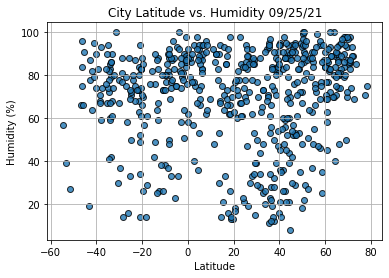

In [67]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

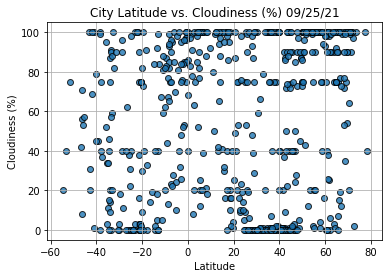

In [68]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

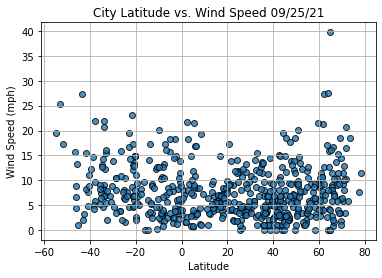

In [69]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()